# Measure Download

Let's assume that we want to get a formula for download speed quality. This formula should be able to return a number between zero and 100. One hundred means the best and 0 means the worst.

## Create a general formula
First, we create a general formula. Let's assume that zero is the worst, 13 MBps is equal to the threshold and 40 MBps is the ideal.

### imports

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from scipy.optimize import curve_fit
from sympy import symbols, Eq, solve, exp


### Plot

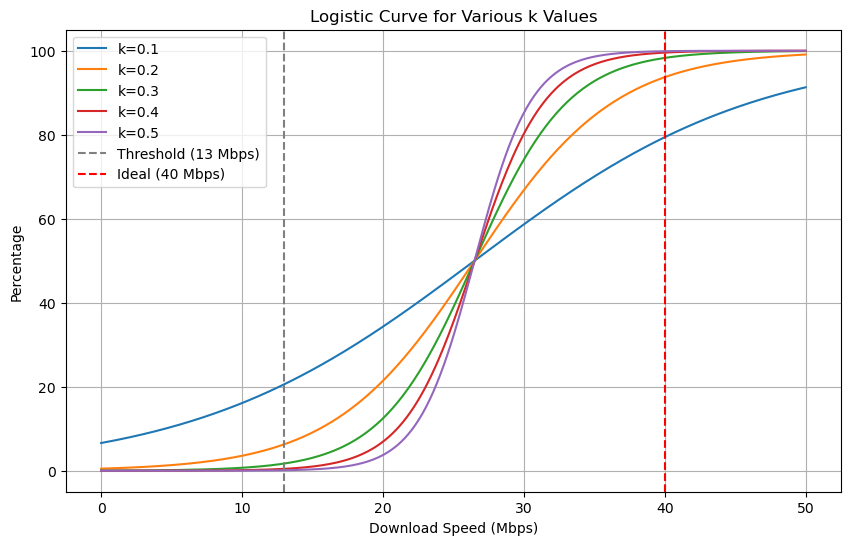

In [2]:
def logistic(s, L=100, k=1, s_0=26.5):
    return L / (1 + np.exp(-k * (s - s_0)))

# Speed values ranging from 0 to 50 for the plot
s_values = np.linspace(0, 50, 400)

# Plot logistic curves for various k values
plt.figure(figsize=(10, 6))
for k in [0.1, 0.2, 0.3, 0.4, 0.5]:
    plt.plot(s_values, logistic(s_values, k=k), label=f'k={k}')

plt.axvline(x=13, color='grey', linestyle='--', label='Threshold (13 Mbps)')
plt.axvline(x=40, color='red', linestyle='--', label='Ideal (40 Mbps)')
plt.title('Logistic Curve for Various k Values')
plt.xlabel('Download Speed (Mbps)')
plt.ylabel('Percentage')
plt.legend()
plt.grid(True)
plt.show()

## Find K

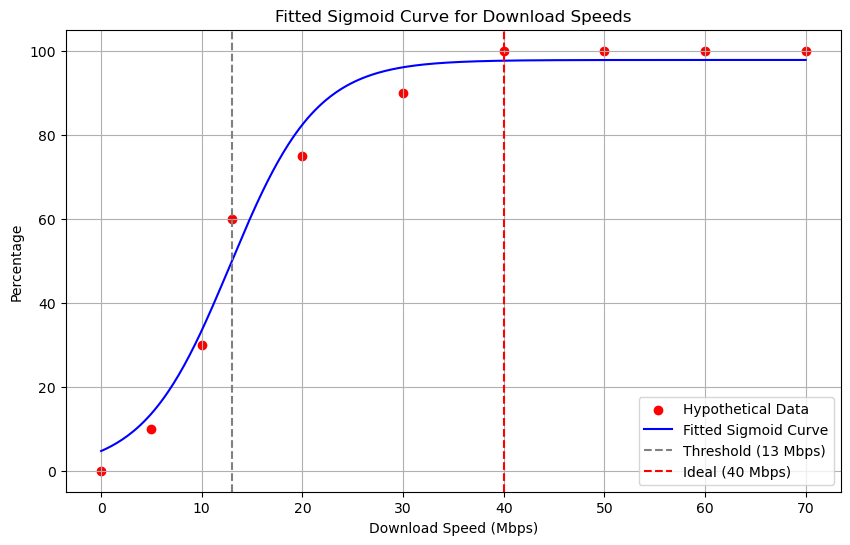

array([97.80071039,  0.23336126, 12.80871125])

In [11]:
# Define the logistic function
def logistic_fit(s, L, k, s_0):
    return L / (1 + np.exp(-k * (s - s_0)))

# Create a hypothetical dataset based on the provided specifications
speeds = np.array([0, 5, 10, 13, 20, 30, 40, 50, 60, 70])
percentages = np.array([0, 10, 30, 60, 75, 90, 100, 100, 100, 100])

# Fit the logistic curve to the hypothetical data
params, covariance = curve_fit(logistic_fit, speeds, percentages, bounds=(0, [100, 5, 50]))

# Generate a smooth set of speed values for plotting
s_values = np.linspace(0, 70, 400)
predicted_percentages = logistic_fit(s_values, *params)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(speeds, percentages, color='red', label='Hypothetical Data')
plt.plot(s_values, predicted_percentages, label='Fitted Sigmoid Curve', color='blue')
plt.axvline(x=13, color='grey', linestyle='--', label='Threshold (13 Mbps)')
plt.axvline(x=40, color='red', linestyle='--', label='Ideal (40 Mbps)')
plt.title('Fitted Sigmoid Curve for Download Speeds')
plt.xlabel('Download Speed (Mbps)')
plt.ylabel('Percentage')
plt.legend()
plt.grid(True)
plt.show()

params

## Final Function

In [13]:
def calculate_percentage(s, L=100, k=0.2334, s_0=12.81):
    """Calculate the percentage P for a given download speed s using the logistic function."""
    return L / (1 + np.exp(-k * (s - s_0)))

# Test the function for a few values
test_speeds = [5, 10, 13, 20, 30, 40, 50]
test_percentages = [calculate_percentage(s) for s in test_speeds]

test_percentages

[13.909176787689448,
 34.167156696728,
 51.10846834944786,
 84.26588748515415,
 98.22270699896647,
 99.82495772635214,
 99.98301026134725]